In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
#######################################################################################
# Reading the data file (CSV) and defining feature and target column
#######################################################################################
# 1. Reading the data file (CSV)
df = pd.read_csv("../0000_Data/01-raw/01-Ad.csv")

# 2. Defining feature columns and target column
x_values = df.iloc[:, 3:5].values
y_values = df.iloc[:, -1].values    

In [27]:
########################################################################################
# Preprocessing Data
########################################################################################
# Train Test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_values, y_values, test_size=0.25, stratify=y_values, random_state=40)

# Scaling the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [28]:
##########################################################################################
# Building the with KNN_Model & Prediction
##########################################################################################
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train_scaled, y_train)
y_pred = knn.predict(x_test_scaled)

In [29]:
##########################################################################################
# Building the with Logistic regression & Prediction 
##########################################################################################
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(x_train_scaled, y_train)
y_pred_log_reg = log_reg.predict(x_test_scaled)

KNN Model Evaluation:
F1 Score: 0.8767
AUC: 0.9054
Accuracy: 0.9100

Logistic Regression Model Evaluation:
F1 Score: 0.7333
AUC: 0.7899
Accuracy: 0.8400


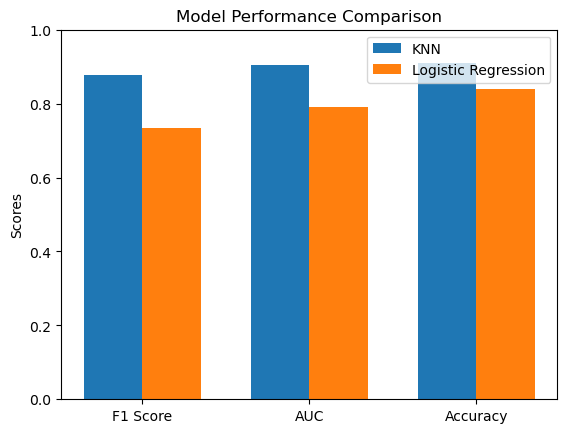

In [30]:
#########################################################################################
# Evaluating the Model with F1 Score & AUC & Accuracy for KNN & Logistic regression
#########################################################################################
# Evaluating the KNN model
from sklearn.metrics import f1_score, roc_auc_score, accuracy_score
f1_knn = f1_score(y_test, y_pred)
auc_knn = roc_auc_score(y_test, y_pred)
accuracy_knn = accuracy_score(y_test, y_pred)
print("KNN Model Evaluation:")
print(f"F1 Score: {f1_knn:.4f}")
print(f"AUC: {auc_knn:.4f}")
print(f"Accuracy: {accuracy_knn:.4f}")
# Evaluating the Logistic Regression model
f1_log_reg = f1_score(y_test, y_pred_log_reg)
auc_log_reg = roc_auc_score(y_test, y_pred_log_reg)
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print("\nLogistic Regression Model Evaluation:")
print(f"F1 Score: {f1_log_reg:.4f}")
print(f"AUC: {auc_log_reg:.4f}")
print(f"Accuracy: {accuracy_log_reg:.4f}")

# Visualizing the model performance with a bar chart
metrics = ['F1 Score', 'AUC', 'Accuracy']
knn_scores = [f1_knn, auc_knn, accuracy_knn]
log_reg_scores = [f1_log_reg, auc_log_reg, accuracy_log_reg]
x = np.arange(len(metrics))
width = 0.35
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, knn_scores, width, label='KNN')
rects2 = ax.bar(x + width/2, log_reg_scores, width, label='Logistic Regression')
ax.set_ylabel('Scores')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()
plt.title('Model Performance Comparison')
plt.ylim(0, 1)
plt.show()

C:\Users\HP  VICTUS\AppData\Local\Temp\ipykernel_12596\1874091944.py:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


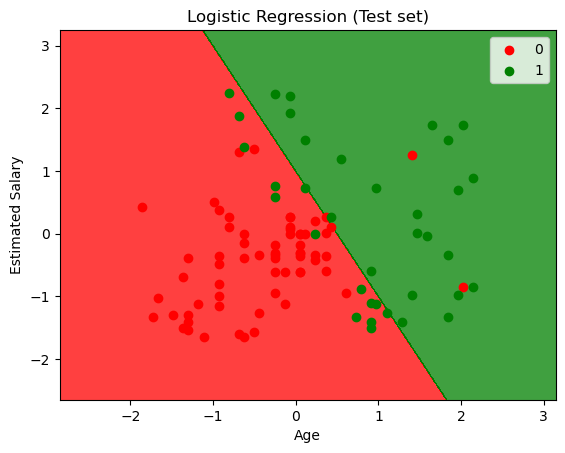

In [32]:
# Visual the logistic regression model's decision boundary
from matplotlib.colors import ListedColormap
X_set, y_set = x_test_scaled, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, log_reg.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()

C:\Users\HP  VICTUS\AppData\Local\Temp\ipykernel_12596\864488658.py:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


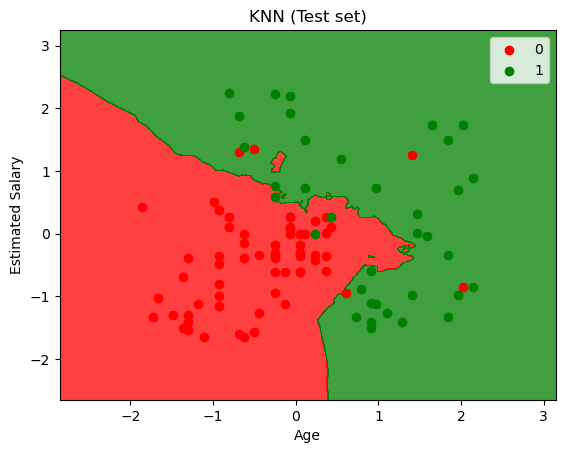

In [34]:
# Visual the KNN model's decision boundary
from matplotlib.colors import ListedColormap
X_set, y_set = x_test_scaled, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, knn.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('KNN (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()